# Handling Imbalanced Data for Bank Customer Churn Prediction
Customer churn prediction is to measure why customers are leaving a business. 

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Bank_Churn_Modelling.csv")
df.sample(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
8940       8941    15658148  Udokamma          657    France    Male   38   
1215       1216    15625080    Parkin          745     Spain  Female   54   
6275       6276    15814940  Lawrence          642     Spain  Female   33   
8431       8432    15586752    Parkes          628   Germany    Male   33   
6886       6887    15670738  Mazzanti          733   Germany    Male   45   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
8940       7       0.00              2          1               0   
1215       8       0.00              1          1               0   
6275       9       0.00              2          1               1   
8431       8  152143.89              1          1               1   
6886       2  113939.36              2          1               0   

      EstimatedSalary  Exited  
8940        185827.74       0  
1215        173912.29       1  
6275        150475.14       0  
8431         32174.03       0  
6886          3218.71       0

### Data Exploration

In [3]:
# Drop RowNumber & CustomerID column (it is of no use)
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis='columns', inplace=True)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df[df['Exited'] == 0]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1             608     Spain  Female   41       1   83807.86              1   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
6             822    France    Male   50       7       0.00              2   
8             501    France    Male   44       4  142051.07              2   
...           ...       ...     ...  ...     ...        ...            ...   
9993          644    France    Male   28       7  155060.41              1   
9994          800    France  Female   29       2       0.00              2   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1             0               1        112542.58       0  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
6             1               1         10062.80       0  
8             0               1         74940.50       0  
...         ...             ...              ...     ...  
9993          1               0         29179.52       0  
9994          0               0        167773.55       0  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9999          1               0         38190.78       0  

[7963 rows x 11 columns]

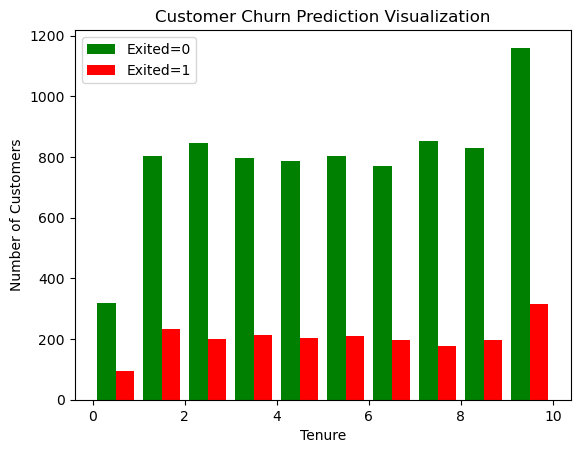

In [6]:
# Data Visualization
tenure_exited_0 = df[df.Exited == 0].Tenure
tenure_exited_1 = df[df.Exited == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_exited_0, tenure_exited_1], color=['green', 'red'], label=['Exited=0', 'Exited=1'])
plt.legend()

In [7]:
for col in df:
    print(col)

CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [8]:
def print_unique_col_values(df):
    for column in df:
        print(f"{column} --> {df[column].dtypes} : {df[column].unique()}")

In [9]:
print_unique_col_values(df)

CreditScore --> int64 : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 49

In [10]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\suman\AppData\Local\Temp\ipykernel_16964\3407678644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)
C:\Users\suman\AppData\Local\Temp\ipykernel_16964\3407678644.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].re

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


#### Using One hot encoding for column "Geography"

In [12]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
df1.sample(3)

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
966          563       1   34       6  139810.34              1          1   
857          741       0   39       7  143637.58              2          0   
147          650       0   37       5  106967.18              1          0   

     IsActiveMember  EstimatedSalary  Exited  Geography_France  \
966               1        152417.79       0              True   
857               1        174227.66       0             False   
147               0         24495.03       0              True   

     Geography_Germany  Geography_Spain  
966              False            False  
857              False             True  
147              False            False

In [14]:
# Convert all boolean columns to integers
df1 = df1.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df1.dtypes

C:\Users\suman\AppData\Local\Temp\ipykernel_16964\756362938.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: int(x) if isinstance(x, bool) else x)


CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [15]:
df1.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0                0  
4                  0                1

### Preprocessing/Scaling

In [16]:
cols_to_scale = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [17]:
df1.sample(5)

CreditScore  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
276         0.812       0   62     0.3  0.000000              1          1   
2185        0.778       0   40     0.1  0.437156              1          1   
4967        0.542       0   40     0.8  0.694014              3          1   
3660        0.288       0   27     0.2  0.000000              2          1   
5556        0.512       0   40     0.6  0.476296              2          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
276                1         0.055943       1                 1   
2185               1         0.966641       0                 0   
4967               0         0.862478       1                 0   
3660               0         0.111976       0                 0   
5556               0         0.233839       0                 1   

      Geography_Germany  Geography_Spain  
276                   0                0  
2185                  0                1  
4967                  1                0  
3660                  0                1  
5556                  0                0

In [18]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [19]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
X_train.shape, y_train.shape

((8000, 12), (8000,))

In [21]:
X_test.shape, y_test.shape

((2000, 12), (2000,))

In [22]:
len(X_train.columns)

12

### Building an ANN model

In [23]:
from tensorflow_addons import losses

C:\Users\suman\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
        
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [26]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5575 - accuracy: 0.7951
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7980
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8040
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8116
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8133
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8138
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8169
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8145
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8188
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4317 - accura

250/250 [==============================] - 0s 988us/step - loss: 0.3987 - accuracy: 0.8363
Epoch 81/100
250/250 [==============================] - 0s 956us/step - loss: 0.3997 - accuracy: 0.8335
Epoch 82/100
250/250 [==============================] - 0s 980us/step - loss: 0.4008 - accuracy: 0.8356
Epoch 83/100
250/250 [==============================] - 0s 966us/step - loss: 0.3978 - accuracy: 0.8375
Epoch 84/100
250/250 [==============================] - 0s 944us/step - loss: 0.4012 - accuracy: 0.8359
Epoch 85/100
250/250 [==============================] - 0s 946us/step - loss: 0.3989 - accuracy: 0.8339
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8353
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8307
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8388
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3996 

## Mitigating Skewness of Data

### Method 1: Undersampling

In [30]:
# Class count
count_class_0, count_class_1 = df1.Exited.value_counts()
# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [31]:
df_class_0.shape

(7963, 13)

In [32]:
df_class_1.shape

(2037, 13)

In [33]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print("Random under-sampling:")
print(df_test_under.Exited.value_counts())

Random under-sampling:
Exited
0    2037
1    2037
Name: count, dtype: int64


In [36]:
X = df_test_under.drop('Exited', axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [37]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [38]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 2s 3ms/step - loss: 1.2690 - accuracy: 0.4544
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4916
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.5750
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6352
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6382
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6640
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.6769
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.6784
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6852
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5993 - accura

102/102 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7432
Epoch 82/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.7321
Epoch 83/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7355
Epoch 84/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7475
Epoch 85/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7373
Epoch 86/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7367
Epoch 87/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7407
Epoch 88/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7410
Epoch 89/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5263 - accuracy: 0.7404
Epoch 90/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 

### Method 2: Oversampling

In [39]:
# Oversample 1-class and concat DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
Exited
0    7963
1    7963
Name: count, dtype: int64


In [40]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [41]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [42]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 3s 4ms/step - loss: 0.7045 - accuracy: 0.5533
Epoch 2/100
399/399 [==============================] - 2s 4ms/step - loss: 0.6215 - accuracy: 0.6626
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5958 - accuracy: 0.6879
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5883 - accuracy: 0.6947
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5863 - accuracy: 0.6962
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5834 - accuracy: 0.6981
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5816 - accuracy: 0.6989
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5801 - accuracy: 0.7038
Epoch 9/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5809 - accuracy: 0.6960
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5805 - accura

399/399 [==============================] - 1s 3ms/step - loss: 0.5758 - accuracy: 0.7044
Epoch 82/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5753 - accuracy: 0.7049
Epoch 83/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5762 - accuracy: 0.7016
Epoch 84/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5749 - accuracy: 0.7063
Epoch 85/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5740 - accuracy: 0.7062
Epoch 86/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5740 - accuracy: 0.7061
Epoch 87/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5747 - accuracy: 0.7059
Epoch 88/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5752 - accuracy: 0.7034
Epoch 89/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5718 - accuracy: 0.7073
Epoch 90/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5724 - accuracy: 

### Method 3: SMOTE

SMOTE --> Synthetic Minority Over-sampling Technique

In [44]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [46]:
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [48]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [49]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 3s 4ms/step - loss: 0.6403 - accuracy: 0.6258
Epoch 2/100
399/399 [==============================] - 1s 4ms/step - loss: 0.5793 - accuracy: 0.6976
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5705 - accuracy: 0.7004
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5694 - accuracy: 0.7039
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5672 - accuracy: 0.7074
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5662 - accuracy: 0.7060
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5669 - accuracy: 0.7032
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5665 - accuracy: 0.7082
Epoch 9/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5653 - accuracy: 0.7094
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5652 - accura

399/399 [==============================] - 1s 3ms/step - loss: 0.4970 - accuracy: 0.7645
Epoch 82/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4971 - accuracy: 0.7627
Epoch 83/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4977 - accuracy: 0.7578
Epoch 84/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4918 - accuracy: 0.7642
Epoch 85/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.7649
Epoch 86/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4932 - accuracy: 0.7614
Epoch 87/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4913 - accuracy: 0.7645
Epoch 88/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4878 - accuracy: 0.7637
Epoch 89/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4907 - accuracy: 0.7635
Epoch 90/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 

### Method 4: Use of Ensemble with Undersampling

In [50]:
df1.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [51]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [55]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [56]:
df2.head()

CreditScore  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
5710        0.856       0   34     0.5  0.554265              2          0   
3745        0.852       1   37     0.1  0.371163              2          1   
5429        0.664       1   48     0.7  0.000000              2          1   
551         0.648       0   47     0.6  0.426077              1          1   
8967        0.970       0   25     0.7  0.000000              2          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
5710               0         0.339721                 1                  0   
3745               1         0.980432                 0                  1   
5429               0         0.325318                 1                  0   
551                1         0.010339                 0                  1   
8967               1         0.417230                 1                  0   

      Geography_Spain  Exited  
5710                0       0  
3745                0       0  
5429                0       0  
551                 0       1  
8967                0       0

In [58]:
df2_class0 = df2[df2.Exited == 0]
df2_class1 = df2[df2.Exited == 1]

In [67]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    
    return X_train, y_train

In [68]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1630)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 2s 3ms/step - loss: 1.2233 - accuracy: 0.5239
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5617
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5936
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6273
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6472
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6635
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6758
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6865
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.6972
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6130 - accura

102/102 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7546
Epoch 82/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7571
Epoch 83/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7561
Epoch 84/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.7552
Epoch 85/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7546
Epoch 86/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7561
Epoch 87/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7577
Epoch 88/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7583
Epoch 89/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7552
Epoch 90/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 

In [69]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1631, 3260)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 2s 3ms/step - loss: 1.6699 - accuracy: 0.5244
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5867
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6180
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.6376
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6530
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6686
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6809
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.6846
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.6840
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6063 - accura

102/102 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.6999
Epoch 82/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.7039
Epoch 83/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.6999
Epoch 84/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.7008
Epoch 85/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7030
Epoch 86/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.7005
Epoch 87/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7051
Epoch 88/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.7045
Epoch 89/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7008
Epoch 90/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 

In [70]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 3261, 4890)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5149
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5796
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6407
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.6487
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.6840
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.6827
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.6876
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.6919
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.6965
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5817 - accura

102/102 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7288
Epoch 82/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.7315
Epoch 83/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7324
Epoch 84/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7352
Epoch 85/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7294
Epoch 86/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7337
Epoch 87/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7456
Epoch 88/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7416
Epoch 89/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7435
Epoch 90/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 

In [71]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 4891, 6370)
y_pred4 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 2s 3ms/step - loss: 0.8215 - accuracy: 0.4497
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5220
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.5889
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6491
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.6632
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6690
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.6793
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.6825
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.6864
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.6906
Epoch 11/

98/98 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7044
Epoch 84/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.7096
Epoch 85/100
98/98 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7070
Epoch 86/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.6970
Epoch 87/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7034
Epoch 88/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.6999
Epoch 89/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 0.7050
Epoch 90/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7038
Epoch 91/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7076
Epoch 92/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7102
Epoch 93/100


In [72]:
len(y_pred1), len(y_pred2), len(y_pred3), len(y_pred4)

(2000, 2000, 2000, 2000)

In [73]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i]
    
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [74]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.40      0.73      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.74      2000

